In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
data = pd.read_csv('mlbdata.csv')

In [3]:
mlbdata = data.iloc[:, :44]
mlbdata.head()

,#Bat,BatAge,PA,AB,R/G,2B,3B,HR,SB,CS,...,CG_F,Ch,E,DP,Rtot,BPF,#a-tA-S,1Run,Under500,SOS
0,36,27.2,38.316129,34.051613,4.05,1.200000,0.109677,0.929032,0.303226,0.225806,...,7.380645,38.193548,1.006452,0.838710,-38,109,13,0.536,0.458,0.1
1,32,28.7,36.857143,32.649351,3.37,1.253247,0.188312,0.649351,0.506494,0.266234,...,7.155844,38.090909,0.649351,0.974026,78,103,17,0.448,0.448,0.0
2,38,28.9,37.883871,33.600000,4.13,1.477419,0.219355,0.800000,0.425806,0.193548,...,7.580645,37.967742,0.838710,0.909677,-43,106,19,0.579,0.445,0.0
3,40,29.1,36.387097,33.322581,2.93,1.103226,0.167742,0.503226,0.367742,0.238710,...,7.245161,37.761290,0.735484,0.870968,8,94,12,0.567,0.361,0.0
4,41,30.0,38.147436,33.634615,4.39,1.320513,0.256410,0.852564,0.442308,0.301282,...,7.410256,39.852564,0.846154,0.948718,-25,110,16,0.449,0.551,-0.1


In [4]:
mlbdatanorm = pd.DataFrame(mlbdata)
mlbdatanormal = (mlbdatanorm - mlbdatanorm.min()) / (mlbdatanorm.max()-mlbdatanorm.min())
mlbdatanormal.insert(44,'Playoffs',data['W-L%'])

In [5]:
mlbdatanormal['Playoffs'] = ((mlbdatanormal['Playoffs'] >= .550).replace({True: 1, False: 0}))

In [6]:
mlbdatanormal.head()

,#Bat,BatAge,PA,AB,R/G,2B,3B,HR,SB,CS,...,Ch,E,DP,Rtot,BPF,#a-tA-S,1Run,Under500,SOS,Playoffs
0,0.175,0.292135,0.594126,0.701810,0.339394,0.151402,0.172537,0.380797,0.096689,0.246236,...,0.621987,0.743973,0.384946,0.391473,0.547619,0.45,0.559387,0.402703,0.545455,0
1,0.075,0.460674,0.356231,0.445843,0.133333,0.191710,0.344682,0.213898,0.197865,0.302859,...,0.609655,0.349282,0.565368,0.841085,0.404762,0.65,0.390805,0.389189,0.454545,0
2,0.225,0.483146,0.523644,0.619373,0.363636,0.361411,0.412642,0.303797,0.157703,0.201055,...,0.594857,0.558574,0.479570,0.372093,0.476190,0.75,0.641762,0.385135,0.454545,0
3,0.275,0.505618,0.279588,0.568733,0.000000,0.078143,0.299651,0.126699,0.128802,0.264308,...,0.570052,0.444482,0.427957,0.569767,0.190476,0.40,0.618774,0.271622,0.454545,0
4,0.300,0.606742,0.566620,0.625692,0.442424,0.242631,0.493763,0.335165,0.165917,0.351948,...,0.821312,0.566802,0.531624,0.441860,0.571429,0.60,0.392720,0.528378,0.363636,0


In [7]:
X = mlbdatanormal.iloc[:,0:-1]
y = mlbdatanormal['Playoffs']

In [8]:
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.feature_selection import SelectKBest, f_classif
fc = SelectKBest(score_func=f_classif)

In [9]:
dicts = defaultdict(list)
finallist = []
for num in range(250):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  fit = fc.fit(X_train,y_train)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_train.columns)
  featureScores = pd.concat([dfcolumns,dfscores], axis=1)
  featureScores.columns = ['Feature','Score']
  keys = featureScores.index
  values = featureScores.loc[:,'Score']
  for i in keys:
    dicts[i].append(values[i])
for k, v in (dicts.items()):
  total = np.sum(v)
  np.sort(total, axis=None)
  final = (k, total/250)
  finallist.append(final)

In [10]:
finaldf = pd.DataFrame(finallist, columns=['Feature', 'Score'])

In [11]:
finaldf.sort_values(by='Score', ascending=False)
allFeatures = featureScores.nlargest(44, 'Score')
allFeatures

,Feature,Score
32,ERA+,472.954539
12,OPS+,326.844826
20,RA/G,230.438742
4,R/G,228.183527
41,1Run,220.664916
22,SV,177.572195
24,H_P,163.818450
40,#a-tA-S,136.858087
26,BB_P,128.074300
10,BB,119.678667


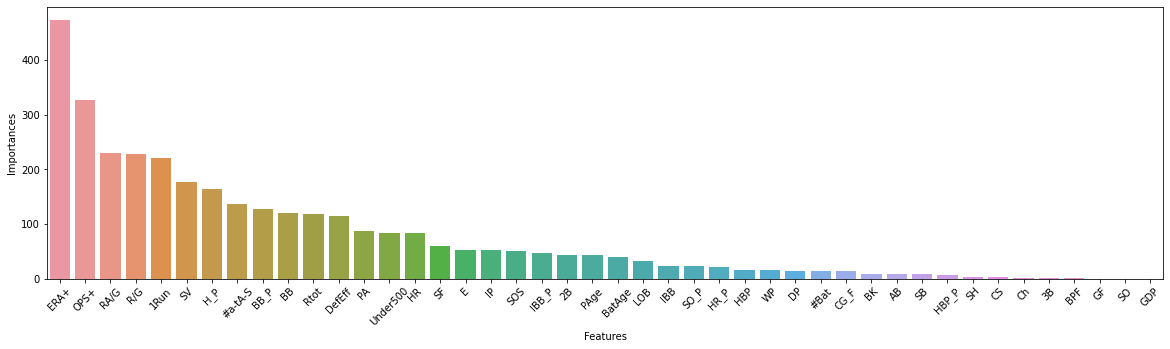

In [12]:
importances = allFeatures['Score']
final_df2 = pd.DataFrame({'Features': allFeatures['Feature'], 'Importances':importances})
final_df2.set_index('Importances')

final_df2 = final_df2.sort_values('Importances', ascending=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x='Features',y='Importances', data=final_df2)

In [13]:
featuresRanked = []
for i in allFeatures['Feature'].head(44):
  featuresRanked.append(i) 

In [14]:
featuresRankedFC = mlbdatanormal[featuresRanked + ['Playoffs']]

In [15]:
featuresRankedFC.to_csv("featuresRankedFC_550.csv")